Вариант 10

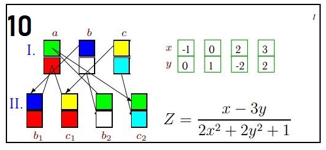

In [ ]:
def qZ(x, y):
  return (x - 3 * y) / (2 * x**2 + 2 * y**2 + 1)

In [ ]:
def qSumZ(Z):
  return sum(Z)

In [ ]:
def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]

  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]

  X[0] = oldX[sortedId[0]]

  X[1] = oldX[sortedId[1]]

  Y[0] = oldX[sortedId[2]]
  Y[1] = oldX[sortedId[2]]

  Y[2] = oldX[sortedId[0]]

  Y[3] = oldX[sortedId[1]]

  return X, Y

In [ ]:
def sorting(Z):
  sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

  return sortedId

In [ ]:
def evoStep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]

  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)

  return X, Y, Z

In [ ]:
def evoSteps(X, Y, stepNum=4):
  results = []

  for i in range(4):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

    X, Y, Z = evoStep(X, Y, arrZ)

    X, Y = exchangeScheme(X, Y, sorting(Z))

    results.append([X, Y, qSumZ(arrZ), arrZ])

  return X, Y, results

In [ ]:
X = [-1, 0, 2, 3]
Y = [0, 1, -2, 2]

In [ ]:
results = evoSteps(X, Y)

In [ ]:
for i in range(len(results[2])):
  print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []

for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: -0.5521885521885521
max_3_step: -0.840958605664488
max_4_step: -0.7407407407407407
max Z: 0.47058823529411764


Вариант 8

image.png)

In [ ]:
import networkx as nx
import math
from math import e

In [ ]:
distances = [(1, 2, 19),
             (1, 3, 39),
             (1, 4, 35),
             (1, 5, 26),
             (1, 6, 18),
             (2, 3, 26),
             (2, 4, 33),
             (2, 5, 37),
             (2, 6, 14),
             (3, 4, 22),
             (3, 5, 41),
             (3, 6, 21),
             (4, 5, 22),
             (4, 6, 19),
             (5, 6, 24)]

V = [1, 4, 2, 3, 5, 6, 1]
Z = [(5, 2), (4, 5), (2, 3), (3, 4)]
P = (88, 54, 24, 64)

T = 100

In [ ]:
def probability(delta, T):
  return 100 * math.e**(-delta / T)

def reductTemp(prevT):
  return 0.5 * prevT

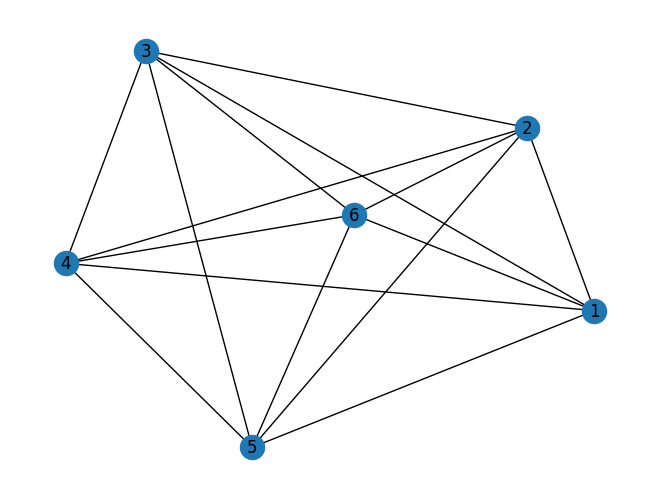

In [ ]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, with_labels=True)

In [ ]:
def edgeLength(i, j, distances, roundTrip=True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [ ]:
def routeLength(V, distances):
  edges = []

  for i in range(len(V) - 1):
    edges.append(edgeLength(V[1], V[i + 1], distances))

  return sum(edges)

In [ ]:
def routeOneReplacement(arrV, Z, replacementByName=True):
  decrement = 1 if replacementByName else 0

  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

  return arrV

In [ ]:
def routeRaplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

In [ ]:
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances)
  arrSum = [sumLength]

  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i])
    newS = routeLength(newV, distances)
    arrSum.append(newS)
    deltaS = newS - sumLength

    if deltaS > 0:
      p = probability(deltaS, T)

      if p > P[0]:
        V = newV
        sumLength = newS

    else:
      V = newV
      sumLength = newS

    T = reductTemp(T)

  return V, arrSum

In [ ]:
def drawRouteGraph(distances, bestRoute):
  newDistances = []

  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
        newDistances.append(distance)

  graph = nx.Graph()

  graph.add_weighted_edges_from(newDistances)

  nx.draw_kamada_kawai(graph, with_labels=True)

Best route: [1, 2, 5, 4, 3, 6, 1]
Best length: 128
All routes: [130, 149, 130, 128, 128]


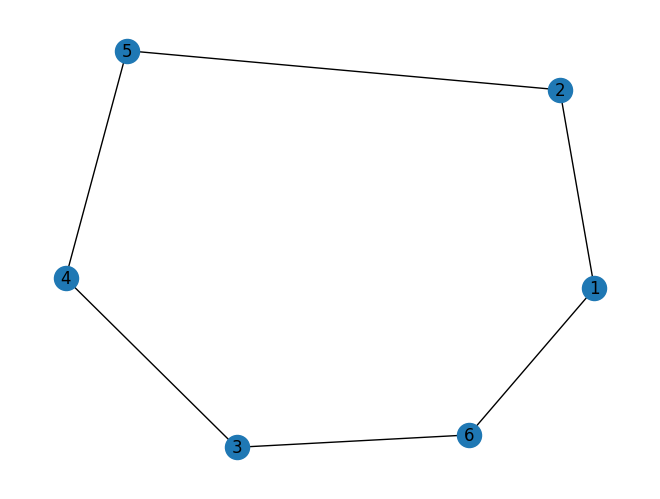

In [ ]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print('Best route:', bestRoute)
print('Best length:', routeLength(bestRoute, distances))
print('All routes:', arrLength)

drawRouteGraph(distances, bestRoute)

In [ ]:
math.sin(math.degrees(51)), math.sin(51)

(0.3927199780562763, 0.6702291758433747)

In [ ]:
def factorial(x):
  f = 1

  for i in range(1, x+1):
    f *= i

  return f

In [ ]:
factorial(5)

120

In [ ]:
def Tsin(x):
  return [(-1)**k * ((x**(2*k)) / factorial(2*k)) for k in range(10)]

In [ ]:
sum(Tsin((math.pi / 4)))

0.7071067811865475